<a href="https://colab.research.google.com/github/snehathth/WWCodeDataScience/blob/master/Statistics%20and%20Data%20Science/6_Statistical_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Statistical Machine Learning***



*   KNN 
*   Tree Models
*   Bagging and Random Forest
*   Boosting


Before this we will define our dataset.


In [ ]:
# Load libraries
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split # Import train_test_split function

# generate dataset
X, y = make_classification(n_samples=10000, n_features=10, n_redundant=2, random_state=0)

# Separate data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train)
X_train.shape

[[-1.39678292e+00  9.06160104e-01 -3.26532251e-01 ... -6.78963855e-01
  -4.01364459e-01  7.77449518e-01]
 [-9.51159376e-01  1.07299950e+00  3.04702029e-01 ...  2.29631386e+00
   2.10332830e-01  9.49781832e-01]
 [-9.33772162e-01  2.38152630e-01 -2.39149477e-01 ... -1.88358006e+00
  -1.57055288e-01  5.81809455e-01]
 ...
 [-2.08130348e+00  1.98407319e+00  1.11355767e-01 ... -2.94975845e+00
   4.51034321e-01  9.36451357e-01]
 [-6.78673638e-01  1.34633470e+00  3.44530249e-01 ...  2.73367911e+00
   2.24276203e-01 -7.26274777e-01]
 [-1.99322452e-03  2.81595925e+00  6.47633796e-01 ... -9.68640960e-01
   1.02469104e+00  7.36570929e-01]]


(7500, 10)

# ***K-Nearest Neighbors***

The k-NN algorithm is arguably the simplest machine learning algorithm. Building
the model consists only of storing the training dataset. To make a prediction for a
new data point, the algorithm finds the closest data points in the training dataset—its
“nearest neighbors.”

K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.



# Why do we need a K-NN Algorithm?

Suppose there are two categories, i.e., Category A and Category B, and we have a new data point x1, so this data point will lie in which of these categories. In its simplest version, the k-NN algorithm only considers exactly one nearest neighbor, which is the closest training data point to the point we want to make a prediction
for. The prediction is then simply the known output for this training point. To solve this type of problem, we need a K-NN algorithm. With the help of K-NN, we can easily identify the category or class of a particular dataset

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


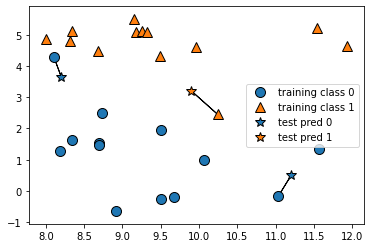

In [ ]:
#!pip install mglearn

import mglearn
mglearn.plots.plot_knn_classification(n_neighbors=1)

# *The K-NN working can be explained on the basis of the below algorithm:*

> Step-1: Select the number K of the neighbors.

>Step-2: Calculate the Euclidean distance of the neighbors.

>Step-3: Take the K nearest neighbors as per the calculated Euclidean distance. 

>Step-4: Among these k neighbors, count the number of the data points in each category. 

>Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.

>Step-6: Model is ready for evaluation.










# 1.Determine the value of K.

The first step is to determine the value of K. The determination of the K value varies greatly depending on the case.Below are some points to remember while selecting the value of K in the K-NN algorithm:

*   A very low value for K such as K=1 or K=2, can be noisy and lead to the effects of outliers in the model.
*   Large values for K are good, but it may find some difficulties.



If using the Scikit-Learn Library the default value of K is 5.

# 2. Calculate the distance of new data with training data.

To calculate distances, 3 distance metrics that are often used are Euclidean Distance, Manhattan Distance, and Minkowski Distance.

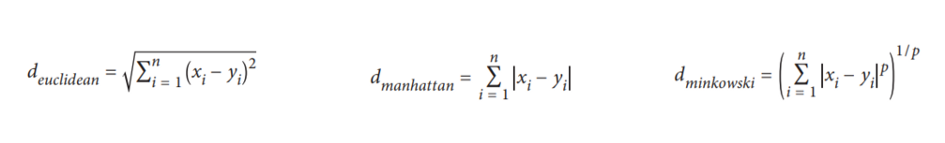

When you use Scikit-Learn, the default distance used is Euclidean. It can be seen in the Minkowski distance formula that there is a Hyperparameter p, if set p = 1 then it will use the Manhattan distance and p = 2 to be Euclidean.


Euclidean Distance being the most used. It is the distance between two points, which we have already studied in geometry. It can be calculated as:

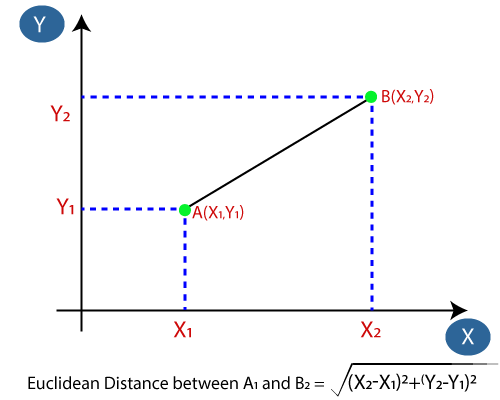


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


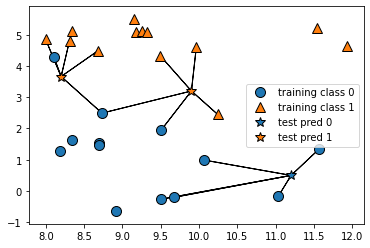

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

## *Why do we need to scale the data?*
All such distance based algorithms are affected by the scale of the variables. Consider your data has an age variable which tells about the age of a person in years and an income variable which tells the monthly income of the person in rupees:
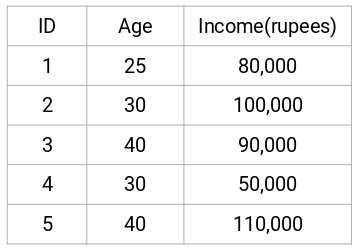

Here the Age of the person ranges from 25 to 40 whereas the income variable ranges from 50,000 to 110,000. Let’s now try to find the similarity between observation 1 and 2. The most common way is to calculate the Euclidean distance and remember that smaller this distance closer will be the points and hence they will be more similar to each other.

Here,
n = number of variables 
p1,p2,p3,… = features of first point
q1,q2,q3,… = features of second point
The Euclidean distance between observation 1 and 2 will be given as:

*Euclidean Distance = [(100000–80000)^2 + (30–25)^2]^(1/2)*

It can be noted here that the high magnitude of income affected the distance between the two points. This will impact the performance of all distance based model as it will give higher weightage to variables which have higher magnitude (income in this case).

We do not want our algorithm to be affected by the magnitude of these variables. The algorithm should not be biased towards variables with higher magnitude. To overcome this problem, we can bring down all the variables to the same scale. 

**Normalization**
We calculate the mean and standard deviation of the variable. Then for each observation, we subtract the mean and then divide by the standard deviation of that variable:

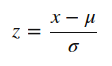

**Min-Max Scaling**

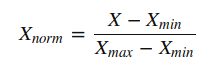

***Strengths and Weakness***

In principle, there are two important parameters to the KNeighbors classifier: 

1. The number of neighbors 
2. How you measure distance between data points.

In practice, using a ***small number of neighbors*** like three or five often works well, but you should certainly adjust this parameter. By default Euclidean distance is used, which works well in many settings.

One of the **strengths** of k-NN is that 
* The model is very easy to understand, and often gives reasonable performance without a lot of adjustments. 

* Using this algorithm is a good baseline method to try before considering more advanced techniques. 

Few **cons** of k-NN is

* Building the nearest neighbors model is usually very fast, but when your training set is very large (either in number of features or in number of samples) prediction can be slow.

* When using the k-NN algorithm, it’s important to preprocess your data. This approach often does not perform well on datasets with many features
(hundreds or more), and it does particularly badly with datasets where most features are 0 most of the time (so-called sparse datasets).

So, while the nearest k-neighbors algorithm is easy to understand, it is not often used
in practice with large datasets, due to prediction being slow and its inability to handle many features.

In [ ]:
# Load libraries
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier # Import K Nearest Neighbors Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create KNeighbors Classifier object
classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict the test values
y_pred = classifier.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.8576


# **Evaluation**

*fit(X,y)* - Fit the k-nearest neighbors classifier from the training dataset.

*get_params([deep])* - Get parameters for this estimator.

*kneighbors([X, n_neighbors, return_distance])*  - Finds the K-neighbors of a point.

*kneighbors_graph([X, n_neighbors, mode])* - Computes the (weighted) graph of k-Neighbors for points in X

*predict(X)* - Predict the class labels for the provided data.

*predict_proba(X*) - Return probability estimates for the test data X.

*score(X, y[, sample_weight])* - Return the mean accuracy on the given test data and labels.


# ***Tree Models***

Tree-based models use a series of if-then rules to generate predictions from one or more decision trees. All tree-based models can be used for either regression (predicting numerical values) or classification (predicting categorical values). We’ll explore three types of tree-based models:

Decision trees, which are the foundation of all tree-based models.


1.   Decision trees, which are the foundation of all tree-based models.
2.   Random forest, an “ensemble” method which builds many decision trees in parallel.
3.   Gradient boosting, an “ensemble” method which builds many decision trees sequentially.


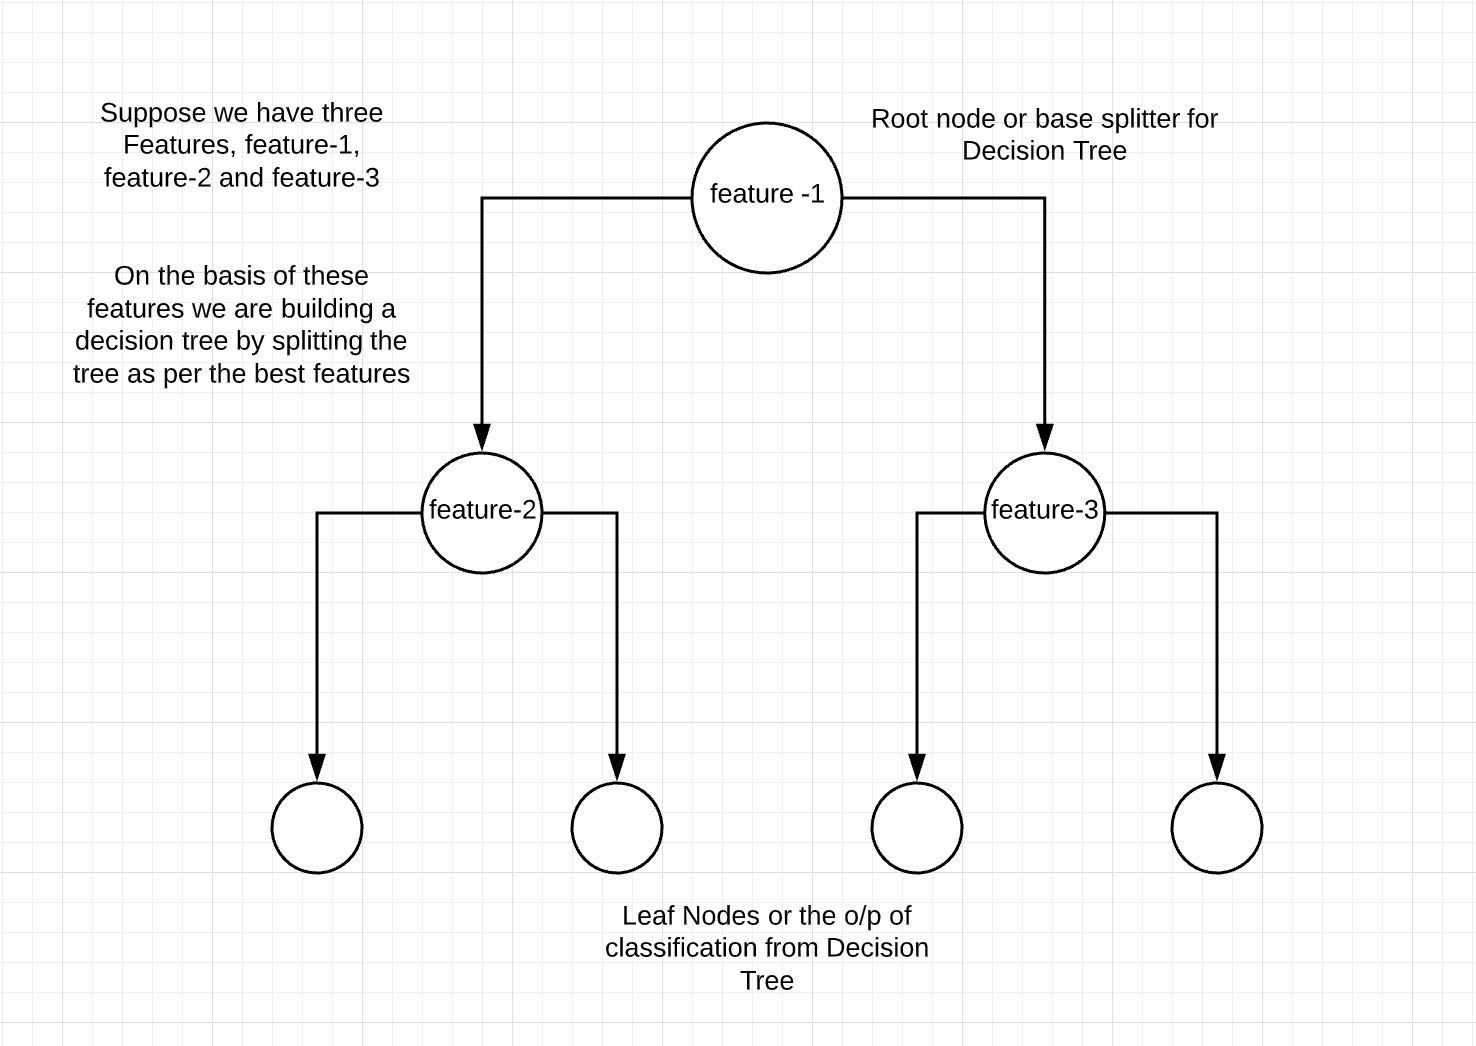



# *How Do We Actually Create These Trees?*

There are essentially two key components to building a decision tree: 

*   Determining which features to split on
> When determining which features to split on, the goal is to select the feature that will produce the most **homogenous** resulting datasets. The simplest and most commonly used method of doing this is by minimizing **entropy**, a measure of the randomness within a dataset, and maximizing **information gain**, the reduction in entropy that results from splitting on a given feature.

*   Deciding when to stop splitting
> We can split until each final node has very few data points, but that will likely result in **overfitting**, or building a model that is too specific to the dataset it was trained on. This is problematic because, while it may make good predictions for that one dataset, it may not generalize well to new data, which is really our larger goal.





**Entropy:**

Entropy helps us to build an appropriate decision tree for selecting the best splitter. Entropy can be defined as a measure of the purity of the sub split. Higher the entropy, lower the level of purity.(high level disorder) 

The algorithm calculates the entropy of each feature after every split and as the splitting continues on, it selects the best feature and starts splitting according to it. 

**Gini Index/Gini Impurity:**

Gini Index is a metric to measure how often a randomly chosen element would be incorrectly identified.
It means an attribute with lower Gini index should be preferred.
Sklearn supports “Gini” criteria for Gini Index and by default, it takes “gini” value.



***Entropy v/s Gini Impurity:***

Now we have learned about Gini Impurity and Entropy.  
*But the major question arises here is why do we need to have both the methods for computation and which is better?*

The internal working of both methods is very similar and both are used for computing the feature/split after every new splitting. But if we compare both the methods then *Gini Impurity is more efficient than entropy* in terms of computing power. As you can see in the graph for entropy, it first increases up to 1 and then starts decreasing, but in the case of Gini impurity it only goes up to 0.5 and then it starts decreasing, hence it requires less computational power. The range of Entropy lies in between 0 to 1 and the range of Gini Impurity lies in between 0 to 0.5. Hence we can conclude that Gini Impurity is better as compared to entropy for selecting the best features.

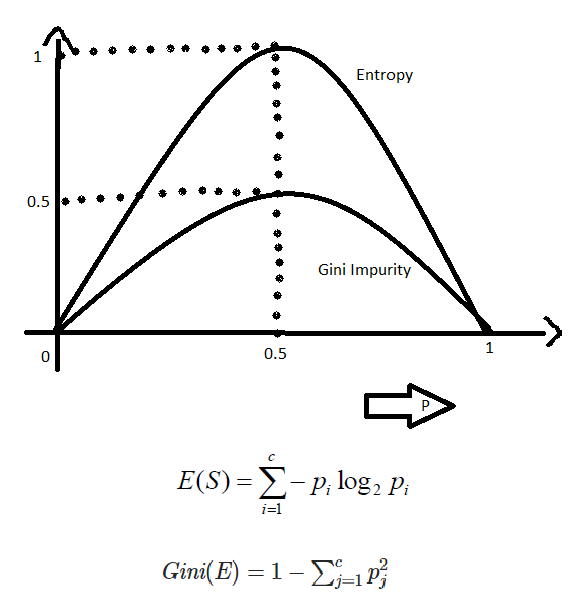



***Stop criterion***

If we continue to grow the tree fully until each leaf node corresponds to the lowest impurity, then the data have typically been **overfitted**. If splitting is stopped too early, error on training data is not sufficiently high and performance will suffer due to bais. 

Thus, preventing overfitting & underfitting are pivotal while modeling a decision tree and it can be done in 2 ways:

1. Setting constraints on tree size
2. Tree pruning

***Setting constraints on tree size:***

* Providing minimum number of samples for a node split.
* Deploying the minimum number of samples for a terminal node (leaf).
* Allowing a certain maximum depth of tree (vertical depth).
* Setting a maximum number of terminal nodes.
* Setting a maximum features to consider for the split.

***Tree pruning:***

**Pruning** is a technique in machine learning that reduces the size of decision trees by removing sections of the tree. It also reduces the complexity of the final classifier, and hence improves predictive accuracy by the reduction of overfitting. 

Tree prunning can be done in two ways by *pre-prunning* or by *post-prunning*.

**pre-prunning**

* Stop splitting the current node if it does not improve the entropy by at least some pre-set(threshold) value.
* Stop partitioning if the number of datapoints are less then some preset(Threshold) values.
* Restricting the depth of the tree to some pre-set(Threshold) value.

**post-prunning**

It can be done by first allowing the tree to grow to its full potential and then prunning the tree at each level after calculating the cross-validation accuracy at each level.

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8732


# ***Regression Problems***
The decision tree will fit each independent variable individually one by one to identify which one of them predicts the target variable most accurately.

While training an independent variable against a target variable in the decision tree, unlike linear regression(assuming you have already studied linear regression), we don’t derive slope value; instead, we derive the **split value** for each variable, which best predicts the target variable.

To find the best split value, the Model will start splitting the independent variable at each possible value and will derive the predicted value by calculating the mean value of target variable on LHS and RHS; then it will calculate the **MSE**(*average square error*) value by comparing the predicted value with actual value.

The split value at which we are getting the **lowest MSE value** will be selected as the optimal one.

Now again the decision tree for the two sub nodes will repeat all the steps we executed on the root node -

1. Select variables one by one
2. Train the variable by finding the split value where MSE is lowest
3. Compare MSE values of all the variables
4. Select the varaible with the lowest MSE

As the training process will move on, the sub-nodes will be divided into a maximum of sub-nodes (depending on ***Min Sample Leaf*** condition), which further will be divided into a ***maximum  leaf nodes***, and then the decision tree training will stop depending on ***Max Depth***.


# *Ensemble Methods*

Ensemble methods, which combines several decision trees to produce better predictive performance than utilizing a single decision tree. The main principle behind the ensemble model is that a group of weak learners come together to form a strong learner.
Let’s talk about few techniques to perform ensemble decision trees:

**1. Bagging**

**2. Boosting**

# ***Bagging and Random Forest***

***Bagging*** (Bootstrap Aggregation) is used when our goal is to reduce the variance of a decision tree. Here idea is to create several subsets of data from training sample chosen randomly with replacement. Now, each collection of subset data is used to train their decision trees. As a result, we end up with an ensemble of different models. Average of all the predictions from different trees are used which is more robust than a single decision tree.

***Random Forest*** is an extension over bagging. It takes one extra step where in addition to taking the random subset of data, it also takes the random selection of features rather than using all features to grow trees. When you have many random trees. It’s called Random Forest.

It is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.


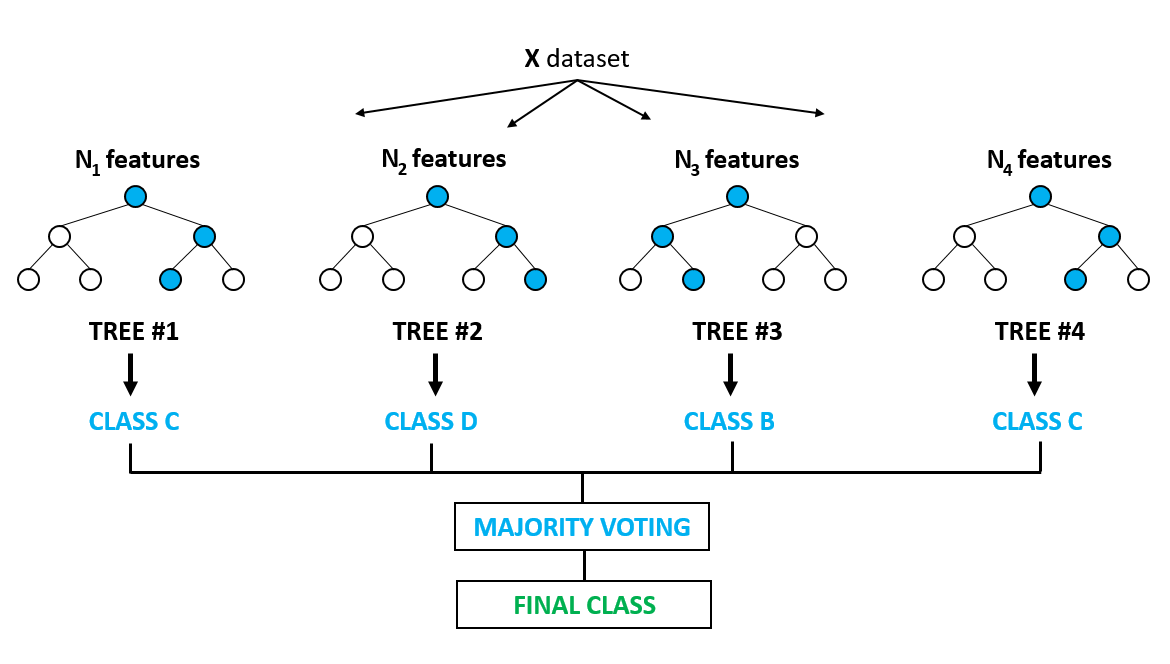

Random forest algorithm parameters:

* ***n_estimators***: The number of trees in the forest.

* ***criterion***: The function to measure the quality of a split. Supported criteria are "***gini***" for the Gini impurity and "***entropy***" for the information gain.

* ***min_samples_split***: The minimum number of samples required to split an internal node.

* ***min_samples_leaf***: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it's leaves contains at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

* ***max_depth***: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

* ***max_features***: The number of features to consider when looking for the best split.

* ***max_leaf_nodes***: Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

* ***min_impurity_decrease***: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

* ***min_impurity_split***: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.





In [ ]:

#evaluating the model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

# define model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)

print('Train:', accuracy_score(y_train, rf_clf.predict(X_train)))
print('Test:', accuracy_score(y_test, rf_clf.predict(X_test)))

Train: 1.0
Test: 0.9052


***Variable Importance***

As the Bagged decision trees are constructed, we can calculate how much the error function drops for a variable at each split point.

These drops in error can be averaged across all decision trees and output to provide an estimate of the importance of each input variable. The greater the drop when the variable was chosen, the greater the importance.

These outputs can help identify subsets of input variables that may be most or least relevant to the problem and suggest at possible feature selection experiments you could perform where some features are removed from the dataset

Feature: 0, Score: 0.02483
Feature: 1, Score: 0.02456
Feature: 2, Score: 0.20829
Feature: 3, Score: 0.02227
Feature: 4, Score: 0.02449
Feature: 5, Score: 0.02378
Feature: 6, Score: 0.10595
Feature: 7, Score: 0.31706
Feature: 8, Score: 0.22448
Feature: 9, Score: 0.02429


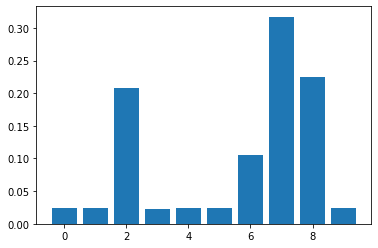

In [ ]:
from matplotlib import pyplot

#get importance
importances = rf_clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importances):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importances))], importances)
pyplot.show()

# *Hyperparameters*

There are several tunable hyperparameters that we should consider when training a model. The main hyperparameters to consider include:

1. The number of trees in the forest
2. The number of features to consider at any given split
3. The complexity of each tree
4. The sampling scheme
5. The splitting rule to use during tree construction

(1) and (2) typically have the **largest impact** on predictive accuracy and should always be tuned. (3) and (4) tend to have **marginal impact** on predictive accuracy but are still worth exploring. They also have the ability to influence computational efficiency. (5) tends to have the **smallest impac**t on predictive accuracy and is used primarily to increase computational efficiency.

# ***Boosting***

*Gradient boosting* is a method that goes through cycles to iteratively add models into an ensemble.

It begins by initializing the ensemble with a single model, whose predictions can be pretty naive. (Even if its predictions are wildly inaccurate, subsequent additions to the ensemble will address those errors.)

Then, we start the cycle:

* First, we use the current ensemble to generate predictions for each observation in the dataset. To make a prediction, we add the predictions from all models in the ensemble.

* These predictions are used to calculate a loss function (like **mean squared error**, for instance).

* Then, we use the loss function to fit a new model that will be added to the ensemble. Specifically, we determine model parameters so that adding this new model to the ensemble will reduce the loss. (Side note: The "gradient" in "gradient boosting" refers to the fact that we'll use **gradient descent** on the loss function to determine the parameters in this new model.)

* Finally, we add the new model to ensemble, and ... ... repeat!

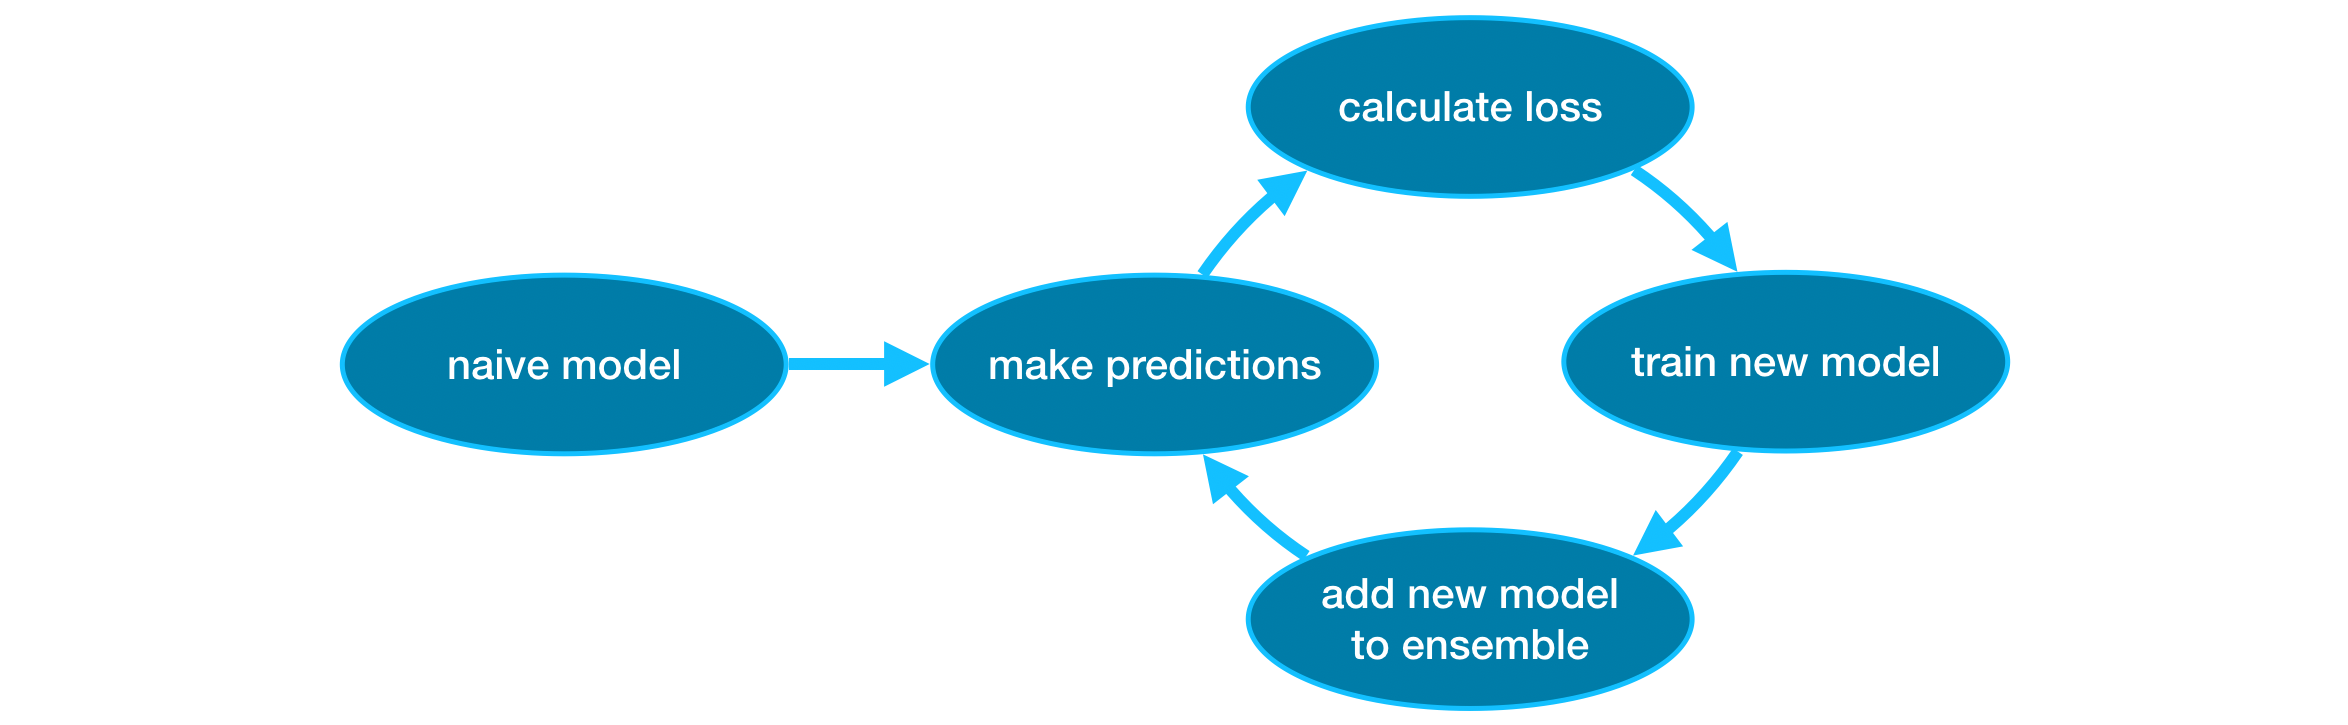

# *XGBoost*

*XGBoost* stands for **extreme gradient boosting**, which is an implementation of gradient boosting with several additional features focused on performance and speed.

To understand it better we will import the scikit-learn API for XGBoost (*xgboost.XGBRegressor*). This allows us to build and fit a model just as we would in scikit-learn.



In [ ]:
import pandas as pd

#using xgboost
from xgboost import XGBClassifier

my_model = XGBClassifier()
my_model.fit(X_train, y_train)

#evaluating the model
from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", my_model.score(X_test, y_test))

Mean Absolute Error: 0.084
Accuracy: 0.916


# *Parameter Tuning*

XGBoost has a few parameters that can dramatically affect accuracy and training speed. The first parameters you should understand are:

***n_estimators***

*n_estimators* specifies how many times to go through the modeling cycle described above. It is equal to the number of models that we include in the ensemble.

* Too low a value causes **underfitting**, which leads to inaccurate predictions on both training data and test data.

* Too high a value causes **overfitting**, which causes accurate predictions on training data, but inaccurate predictions on test data (which is what we care about).

Typical values range from 100-1000, though this depends a lot on the *learning_rate* parameter.

In [ ]:
my_model = XGBClassifier(n_estimators = 350)
my_model.fit(X_train, y_train)

#evaluating the model
from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", my_model.score(X_test, y_test))

Mean Absolute Error: 0.084
Accuracy: 0.916


***early_stopping_rounds***

*early_stopping_rounds* offers a way to automatically find the ideal value for n_estimators. Early stopping causes the model to stop iterating when the validation score stops improving, even if we aren't at the hard stop for *n_estimators*. It's smart to set a high value for *n_estimators* and then use *early_stopping_rounds* to find the optimal time to stop iterating.

Since random chance sometimes causes a single round where validation scores don't improve, you need to specify a number for how many rounds of straight deterioration to allow before stopping. Setting **early_stopping_rounds** is good. As, we stop after certain no. of straight rounds of deteriorating validation scores.

When using early_stopping_rounds, you also need to set aside some data for *calculating the validation scores* - this is done by setting the **eval_set** parameter.

In [ ]:
my_model.fit(X_train, y_train, 
             early_stopping_rounds=8, 
             eval_set=[(X_test, y_test)], verbose=False)

#evaluating the model
from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", my_model.score(X_test, y_test))


Mean Absolute Error: 0.082
Accuracy: 0.918


***learning_rate***

It is how strongly each tree tries to correct the mistake of the previous tree. A higher learning rate means each tree can make stronger corrections, allowing more complex models.

So, we can set a higher value for n_estimators without overfitting. If we use early stopping, the appropriate number of trees will be determined automatically.

In general, a small learning rate and large number of estimators will yield more accurate XGBoost models, though it will also take the model longer to train since it does more iterations through the cycle. As default, XGBoost sets **learning_rate=0.1**.

In [ ]:
my_model = XGBClassifier(n_estimators=350, learning_rate=0.099)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=8, 
             eval_set=[(X_test, y_test)], 
             verbose=False)

#evaluating the model
from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", my_model.score(X_test, y_test))


Mean Absolute Error: 0.0956
Accuracy: 0.9044


# ***Conclusion***

We learned 4 types of supervised learning algorithms and statistical concepts related to them like entropy, gini index, distance measures. These concepts helped us in understanding the working of these models even better. Some of them are better suited for smaller datasets whereas others work efficiently in larger datasets.

The accuracy of all the 4 algorithms on a particular dataset is such as -


> KNNeighbors - 0.8484


> Decision Trees - 0.8732


> Random Forest -  0.908


> XGBoosting - 0.9128


As we can see the accuracy increases when we use Tree models as they are **better at evaluating dataset having large number of features/variables**. They do not require pre-processing of data like normalization, etc which is required in KNN models as we use euclidean distance.

We also observe that the Ensemble models work better than Decisions Trees this is because they tend to ***generalize the data better*** which furthermore **increases the accuracy**.







